Get data from 'highquality_final_merged.csv'

For Classifier, adding 'Rating-Category' column

        Train and test DecisionTreeClassifier and KNNClassifier
        Plot graph of feature importance and confusion matrix


For Regresson

        Train and test LinearRegresson and DecisionTreeRegresson
        Plot graph of feature importance


Compare their RMSE and R2

Then, we got that the MSE and R2 of linear regresson is the best

In [1]:
import pandas as pd
hq_df = pd.read_csv('highquality_final_merged.csv')

In [2]:
# Import all modules needed
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Text(0, 0.5, 'Frequency')

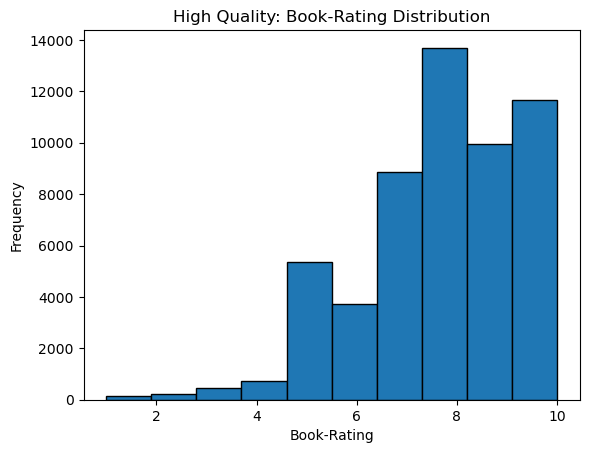

In [3]:
# Show the distribution of ratings from high quality users
plt.hist(hq_df['Book-Rating'], bins=10, edgecolor='black')

# Set plot title and labels
plt.title('High Quality: Book-Rating Distribution')
plt.xlabel('Book-Rating')
plt.ylabel('Frequency')

Make Rating Category

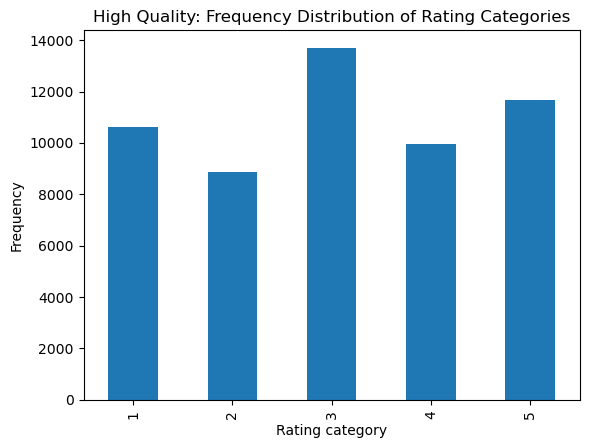

In [4]:
# Categorize rating for high quality
hq_df['Rating-Category'] = pd.cut(hq_df['Book-Rating'], 
                                    bins=[0, 6, 7, 8, 9,10], 
                                    labels=[1, 2, 3, 4, 5], 
                                    right=True)
rating_counts = hq_df['Rating-Category'].value_counts().sort_index()
rating_counts.plot(kind='bar')

# Set plot title and labels
plt.title('High Quality: Frequency Distribution of Rating Categories')
plt.xlabel('Rating category')
plt.ylabel('Frequency')

# Display the plot
plt.show()

Change to Classfication

Decision Tree Classifier Metrics:
Accuracy:0.2101
F1-score:0.2053
classification Report:
              precision    recall  f1-score   support

           1       0.34      0.36      0.35      2106
           2       0.23      0.23      0.23      1755
           3       0.31      0.32      0.31      2708
           4       0.26      0.24      0.25      2028
           5       0.39      0.37      0.38      2366

    accuracy                           0.31     10963
   macro avg       0.30      0.30      0.30     10963
weighted avg       0.31      0.31      0.31     10963




KNN Classifier Metrics:
Accuracy: 0.2361
F1-score:0.2279
classification Report:
              precision    recall  f1-score   support

           1       0.30      0.39      0.34      2106
           2       0.22      0.21      0.22      1755
           3       0.29      0.31      0.30      2708
           4       0.26      0.21      0.23      2028
           5       0.38      0.32      0.35      2366

    accuracy 

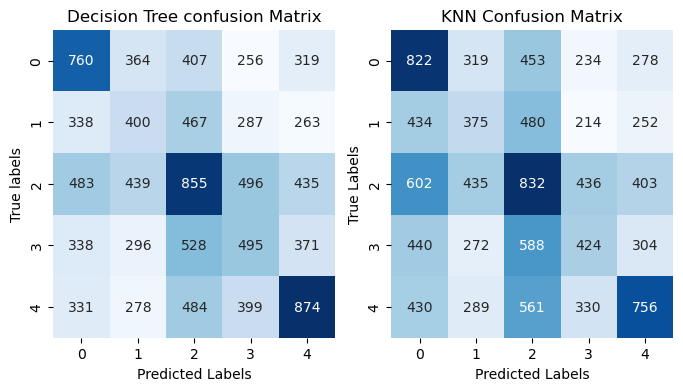

In [5]:
# Drop unnecessary columns and set x and y
x = hq_df.drop(columns=['User-ID', 'ISBN', 'Book-Rating', 'Rating-Category', 
                        'Book-Title', 'Book-Author', 'Book-Publisher', 
                        'Year-Of-Publication-Bin', 'Filtered-Title', 
                        'User-City', 'User-State', 'User-Country', 'User-Age-Bin'])
y = hq_df['Rating-Category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

#Cross-validation for Decision Tree Classifier
dt_accuracy = cross_val_score(dt_classifier, x, y, cv=5, scoring='accuracy')
dt_f1 = cross_val_score(dt_classifier, x, y, cv=5, scoring='f1_macro')

# Train Decision Tree Classifier
dt_classifier.fit(x_train, y_train)
dt_predictions =dt_classifier.predict(x_test)

# Compute Decision Tree Classifier metrics
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
dt_classification_report = classification_report(y_test, dt_predictions)

# Initialize KNN Classifier
knn_classifier = KNeighborsClassifier()

#Cross-validation for KNN Classifier
knn_accuracy = cross_val_score(knn_classifier, x, y, cv=5, scoring='accuracy')
knn_f1 = cross_val_score(knn_classifier, x, y, cv=5, scoring='f1_macro')

# Train KNN Classifier
knn_classifier.fit(x_train,y_train)
knn_predictions =knn_classifier.predict(x_test)

# Compute KNN Classifier metrics
knn_confusion_matrix= confusion_matrix(y_test, knn_predictions)
knn_classification_report = classification_report(y_test, knn_predictions)


# Print results
print('Decision Tree Classifier Metrics:')
print(f'Accuracy:{np.mean(dt_accuracy):.4f}')
print(f'F1-score:{np.mean(dt_f1):.4f}')
print('classification Report:')
print(dt_classification_report)

print('\n\n')

print('KNN Classifier Metrics:')
print(f'Accuracy: {np.mean(knn_accuracy):.4f}')
print(f'F1-score:{np.mean(knn_f1):.4f}')
print('classification Report:')
print(knn_classification_report)



plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.heatmap(dt_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True labels")

plt.subplot(1, 2, 2)
sns.heatmap(knn_confusion_matrix,annot=True,fmt="d",cmap="Blues",cbar=False)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

In [ ]:
# LinearRegresson for high quality
x = hq_df.drop(columns=['User-ID', 'ISBN', 'Book-Rating', 'Rating-Category', 
                        'Book-Title', 'Book-Author', 'Book-Publisher', 
                        'Year-Of-Publication-Bin', 'Filtered-Title', 
                        'User-City', 'User-State', 'User-Country', 'User-Age-Bin'])
y = hq_df['Book-Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Compute MSE and R2 of linear regresson
linear_reg= LinearRegression()
linear_scores = cross_val_score(linear_reg, x, y, cv= 5, scoring= 'neg_mean_squared_error')
linear_r2_scores = cross_val_score(linear_reg, x ,y, cv=5, scoring = 'r2')
linear_rmse_scores= (-linear_scores)**0.5

print('Linear Regression Cross-Validation RMSE Scores:')
print(linear_rmse_scores)
print('Linear Regression Mean RMSE:', linear_rmse_scores.mean())
print()
print('Linear Regression Cross-Validation R^2 Scores:')
print(linear_r2_scores)
print('Linear Regression Mean R^2:', linear_r2_scores.mean())

Linear Regression Cross-Validation RMSE Scores:
[1.71428899 1.63409409 1.7890302  1.74265684 1.76825692]
Linear Regression Mean RMSE: 1.7296654059555703

Linear Regression Cross-Validation R^2 Scores:
[0.01390722 0.00130346 0.0001738  0.00140475 0.00268774]
Linear Regression Mean R^2: 0.0038953933290548194


In [ ]:
# Initialize Decision Tree Regression model
dt_reg= DecisionTreeRegressor(random_state=42)

# Cross-validation for Decision Tree Regression
dt_scores = cross_val_score(dt_reg, x, y, cv=5,scoring='neg_mean_squared_error')
dt_r2_scores =cross_val_score(dt_reg, x, y, cv=5,scoring='r2')
dt_rmse_scores =(-dt_scores)**0.5
print('Decision Tree Regression Cross-Validation RMsE Scores:')
print(dt_rmse_scores)
print('Decision Tree Regression Mean RMSE:', dt_rmse_scores.mean())
print()
print('Decision Tree Regression Cross-Validation R^2 Scores:')
print(dt_r2_scores)
print('Decision Tree Regression Mean R^2:', dt_r2_scores.mean())

Decision Tree Regression Cross-Validation RMsE Scores:
[2.44813448 2.37225285 2.40090407 2.42436686 2.41561355]
Decision Tree Regression Mean RMSE: 2.4122543626487154

Decision Tree Regression Cross-Validation R^2 Scores:
[-1.01103788 -1.10475419 -0.80068931 -0.93269101 -0.86120984]
Decision Tree Regression Mean R^2: -0.9420764442334322


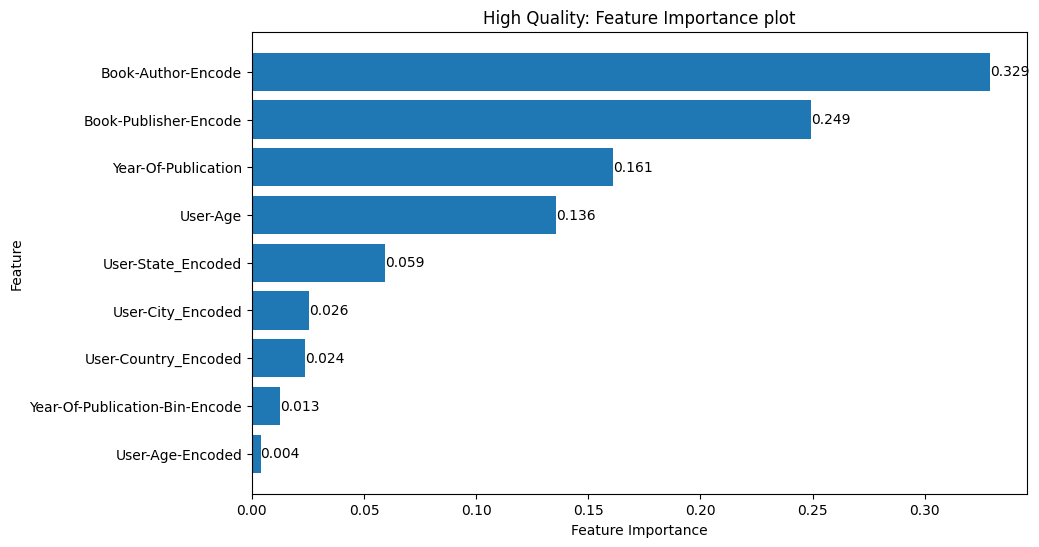

In [ ]:
# Plot the feature importance of high quality
dt_reg.fit(x, y)
feature_importances = dt_reg.feature_importances_
feature_names =x.columns
sorted_idx= np.argsort(feature_importances)
exact_value_sorted_idx = sorted(feature_importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
for i in range(len(sorted_idx)):
    plt.text(exact_value_sorted_idx[i], i, str(round(exact_value_sorted_idx[i], 3)), ha='left', va='center')
    
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('High Quality: Feature Importance plot')
plt.show()